#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import scipy
from sklearn.model_selection import train_test_split

#### Load the images

In [3]:
# Step 1: Load and preprocess the data

rgb_images_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images"
bw_images_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic"
color_masks_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks"
csv_file = "C:/Github/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv"

print("Loading the dataset...")
print(rgb_images_dir)
print(bw_images_dir)
print(color_masks_dir)
print(csv_file)

Loading the dataset...
C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images
C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic
C:/Github/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks
C:/Github/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv


#### Pre processing of data

In [5]:
def load_data():
    rgb_images = []
    rgb_images_names = []
    bw_images = []
    bw_images_names = []
    color_masks = []
    color_masks_names = []

    # Load RGB images
    for image_name in sorted(os.listdir(rgb_images_dir)):
        image_path = os.path.join(rgb_images_dir, image_name)
        if image_name.lower().endswith('.jpg') or image_name.lower().endswith('.jpeg'):
            label = os.path.splitext(image_name)[0]
            rgb_images.append(image_path)
            rgb_images_names.append(label)

    # Load black and white images
    for image_name in sorted(os.listdir(bw_images_dir)):
        image_path = os.path.join(bw_images_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            bw_images.append(image_path)
            bw_images_names.append(label)

    # Load color masks
    for image_name in sorted(os.listdir(color_masks_dir)):
        image_path = os.path.join(color_masks_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            color_masks.append(image_path)
            color_masks_names.append(label)

    return rgb_images, bw_images, color_masks

# Call the function to load the data
rgb_images, bw_images, color_masks = load_data()

# Print the number of images loaded
print("Number of RGB images loaded:", len(rgb_images))
print("Number of black and white images loaded:", len(bw_images))
print("Number of color masks loaded:", len(color_masks))

Number of RGB images loaded: 400
Number of black and white images loaded: 400
Number of color masks loaded: 400


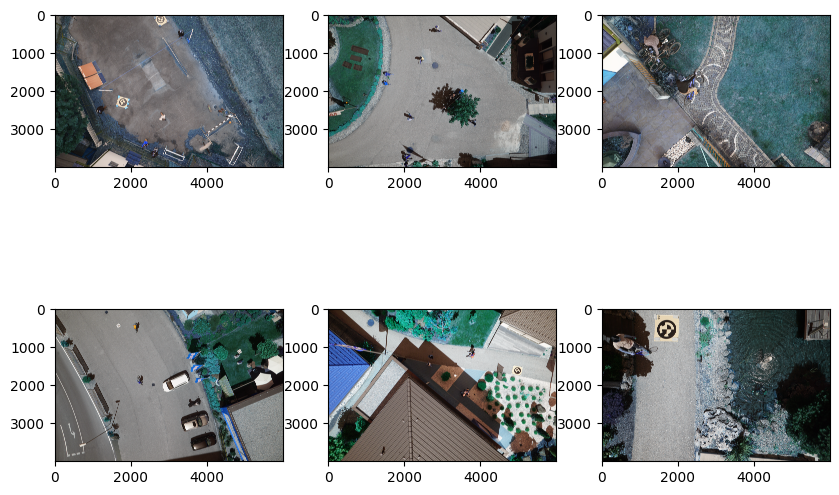

In [6]:
# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(rgb_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

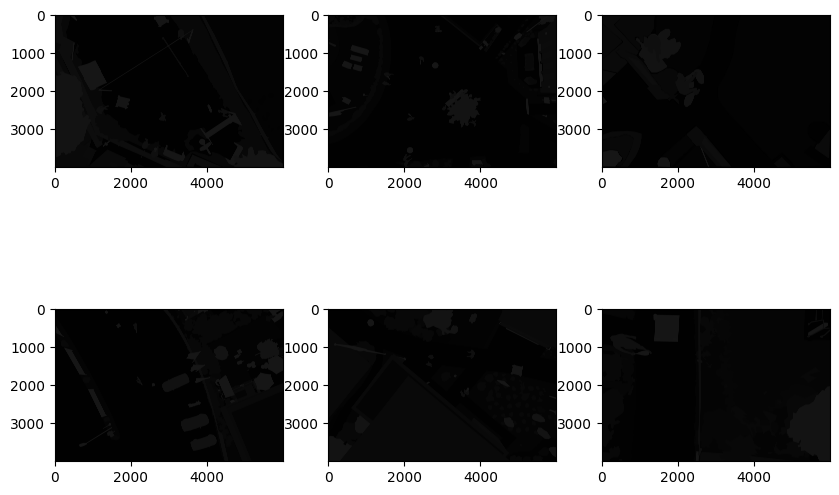

In [7]:
# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(bw_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

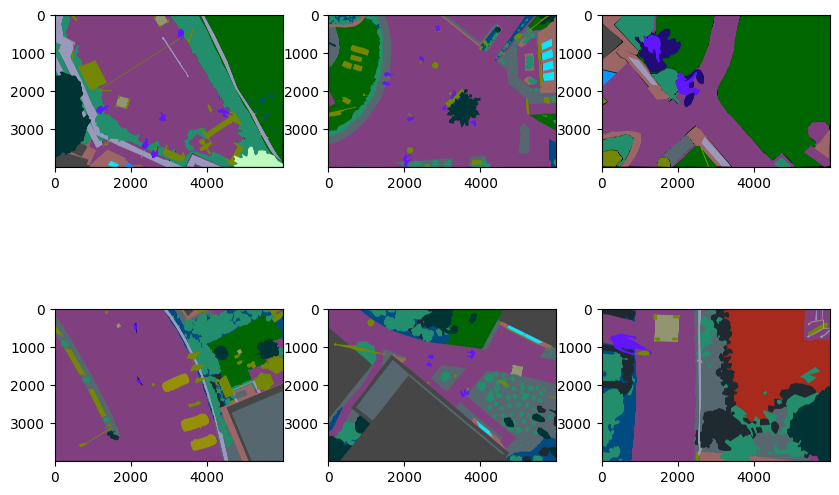

In [8]:
# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(color_masks[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

#### Split the data into train and test sets

In [ ]:
# Step 2: Prepare the training data
input_images = rgb_images  # Use RGB images as input
output_masks = color_masks  # Use color masks as output

# Step 3: Split the data
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Split into train and test sets
train_images, test_images, train_masks, test_masks = train_test_split(input_images, output_masks, test_size=test_ratio, random_state=42)

# Further split train set into train and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

# Print the number of images and masks
print("Number of train images:", len(train_images))
print("Number of train masks:", len(train_masks))
print("Number of val images:", len(val_images))
print("Number of val masks:", len(val_masks))
print("Number of test images:", len(test_images))
print("Number of test masks:", len(test_masks))

Number of train images: 279
Number of train masks: 279
Number of val images: 81
Number of val masks: 81
Number of test images: 40
Number of test masks: 40
